DP3 Stock Price Prediction with 80% Training and 20% Testing - Testing RMSE: 48774.18, MAPE: 67.56%, MSLE: 0.28


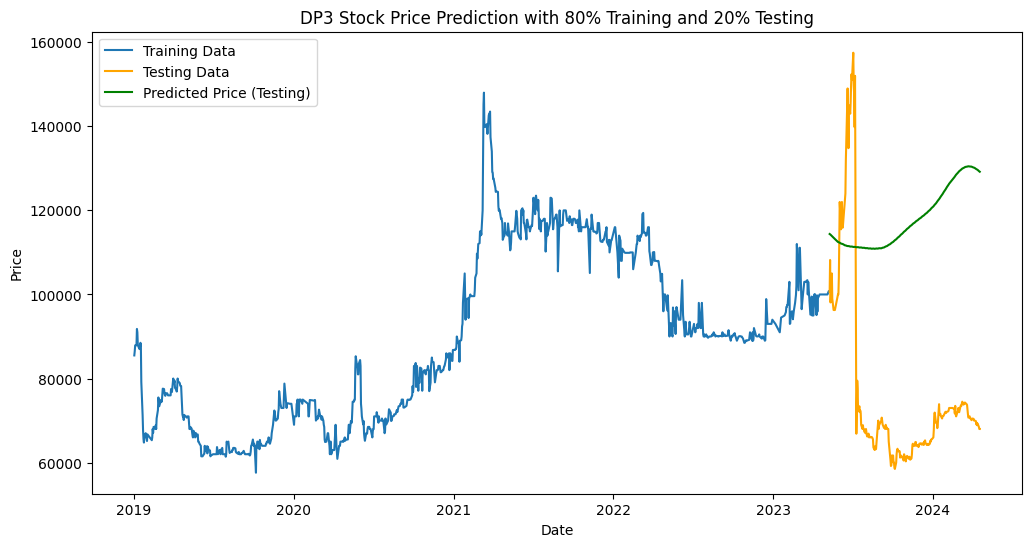

DP3 Stock Price Prediction with 70% Training and 30% Testing - Testing RMSE: 54681.37, MAPE: 69.13%, MSLE: 0.31


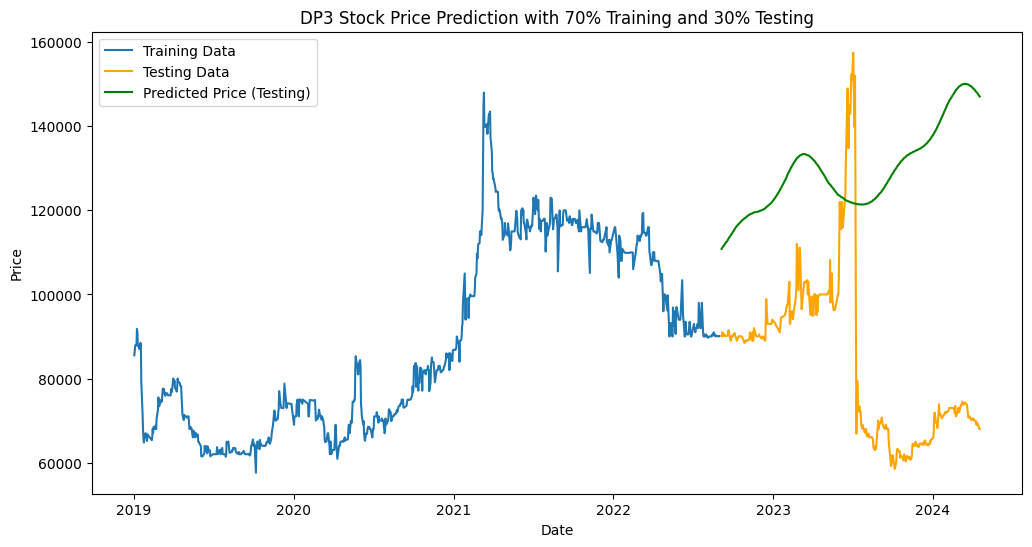

DP3 Stock Price Prediction with 90% Training and 10% Testing - Testing RMSE: 45471.00, MAPE: 66.45%, MSLE: 0.26


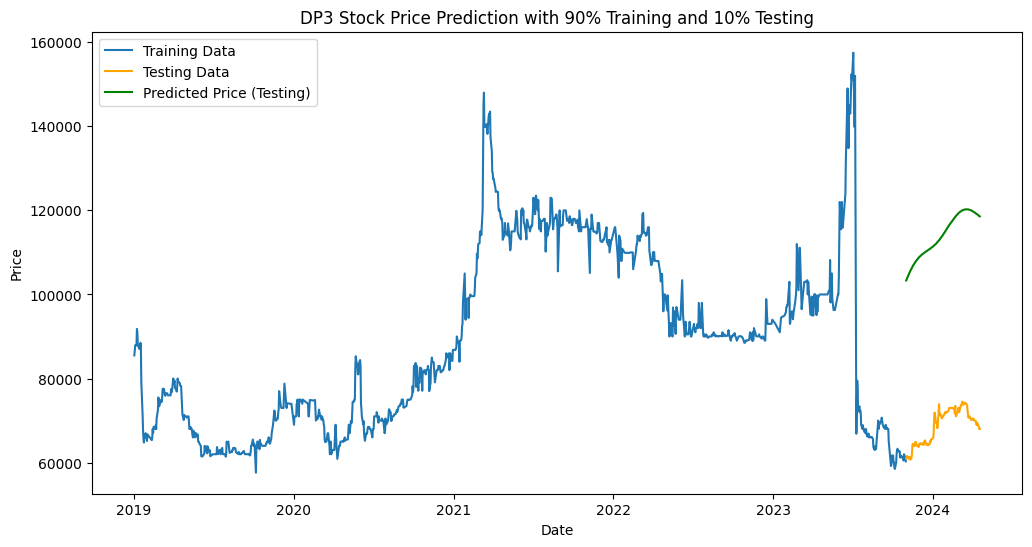

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Load data
df = pd.read_csv('DP3 Historical Data (1).csv', parse_dates=['Date'])

# Sort the DataFrame by date
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)

# Clean the Price column by removing commas and converting to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Define Fourier terms for annual seasonality
fourier = CalendarFourier(freq='YE', order=3)

# Define the deterministic process
dp = DeterministicProcess(
    index=df.index,
    constant=True,    # includes intercept
    order=1,          # includes linear trend
    seasonal=False,   # no built-in seasonal terms
    additional_terms=[fourier],
    drop=True,
)

X = dp.in_sample()

def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    msle = mean_squared_log_error(y_true, y_pred)
    return rmse, mape, msle

def plot_predictions(train_ratio, title):
    train_size = int(len(X) * train_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = df['Price'][:train_size], df['Price'][train_size:]

    # Fit the linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions for the testing set
    predictions_test = model.predict(X_test)

    # Evaluate testing predictions
    rmse_test, mape_test, msle_test = evaluate(y_test, predictions_test)

    print(f'{title} - Testing RMSE: {rmse_test:.2f}, MAPE: {mape_test:.2f}%, MSLE: {msle_test:.2f}')

    # Plotting predictions for the entire dataset
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[:train_size], y_train, label='Training Data')
    plt.plot(df.index[train_size:], y_test, label='Testing Data', color='orange')
    plt.plot(df.index[train_size:], predictions_test, label='Predicted Price (Testing)', color='green')
    plt.legend()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Plot predictions for different splits and print evaluation metrics
plot_predictions(0.8, 'DP3 Stock Price Prediction with 80% Training and 20% Testing')
plot_predictions(0.7, 'DP3 Stock Price Prediction with 70% Training and 30% Testing')
plot_predictions(0.9, 'DP3 Stock Price Prediction with 90% Training and 10% Testing')


DHT Stock Price Prediction with 80% Training and 20% Testing - Testing RMSE: 8043.72, MAPE: 29.24%, MSLE: 0.16


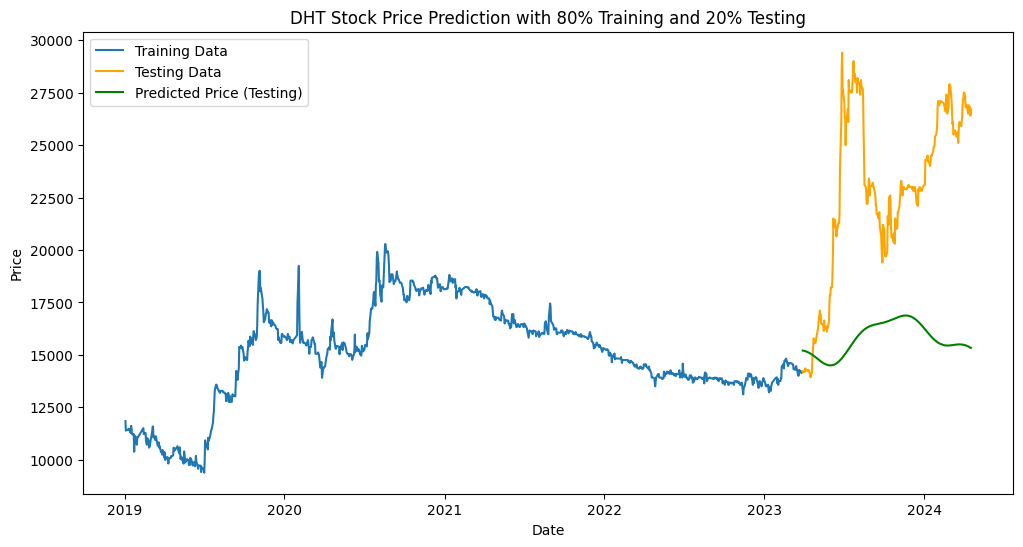

DHT Stock Price Prediction with 70% Training and 30% Testing - Testing RMSE: 5726.49, MAPE: 24.00%, MSLE: 0.08


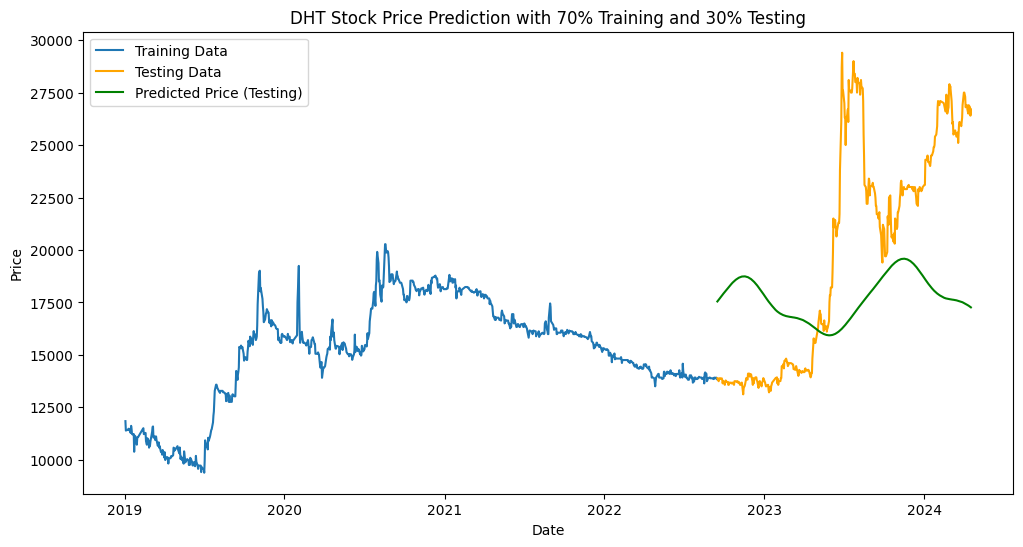

DHT Stock Price Prediction with 90% Training and 10% Testing - Testing RMSE: 6725.16, MAPE: 24.92%, MSLE: 0.10


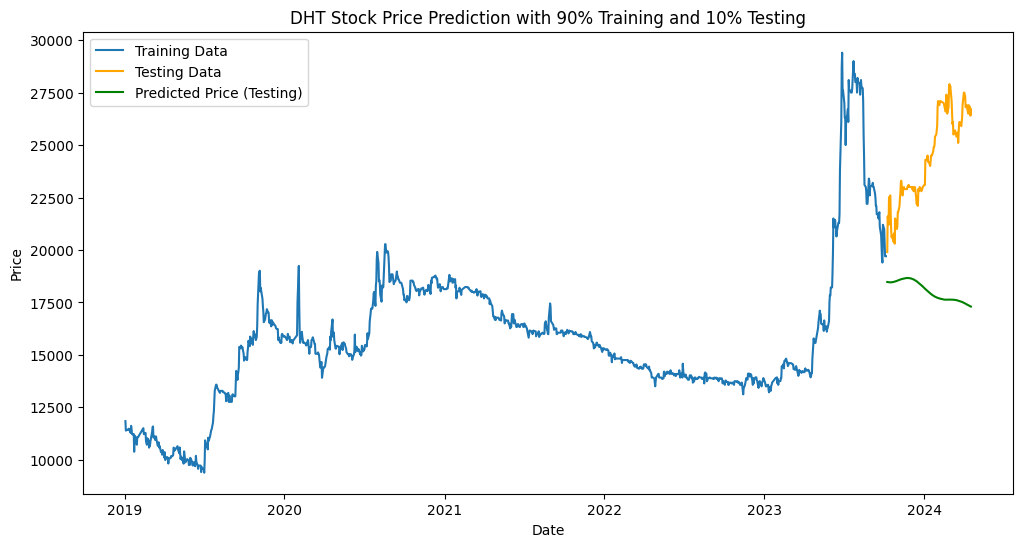

In [10]:
# Load data
df = pd.read_csv('DHT Historical Data.csv', parse_dates=['Date'])

# Sort the DataFrame by date
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)

# Clean the Price column by removing commas and converting to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Define Fourier terms for annual seasonality
fourier = CalendarFourier(freq='YE', order=3)

# Define the deterministic process
dp = DeterministicProcess(
    index=df.index,
    constant=True,    # includes intercept
    order=1,          # includes linear trend
    seasonal=False,   # no built-in seasonal terms
    additional_terms=[fourier],
    drop=True,
)

X = dp.in_sample()

def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    msle = mean_squared_log_error(y_true, y_pred)
    return rmse, mape, msle

def plot_predictions(train_ratio, title):
    train_size = int(len(X) * train_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = df['Price'][:train_size], df['Price'][train_size:]

    # Fit the linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions for the testing set
    predictions_test = model.predict(X_test)

    # Evaluate testing predictions
    rmse_test, mape_test, msle_test = evaluate(y_test, predictions_test)

    print(f'{title} - Testing RMSE: {rmse_test:.2f}, MAPE: {mape_test:.2f}%, MSLE: {msle_test:.2f}')

    # Plotting predictions for the entire dataset
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[:train_size], y_train, label='Training Data')
    plt.plot(df.index[train_size:], y_test, label='Testing Data', color='orange')
    plt.plot(df.index[train_size:], predictions_test, label='Predicted Price (Testing)', color='green')
    plt.legend()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Plot predictions for different splits and print evaluation metrics
plot_predictions(0.8, 'DHT Stock Price Prediction with 80% Training and 20% Testing')
plot_predictions(0.7, 'DHT Stock Price Prediction with 70% Training and 30% Testing')
plot_predictions(0.9, 'DHT Stock Price Prediction with 90% Training and 10% Testing')

AMV Stock Price Prediction with 80% Training and 20% Testing - Testing RMSE: 2031.85, MAPE: 44.21%, MSLE: 0.15


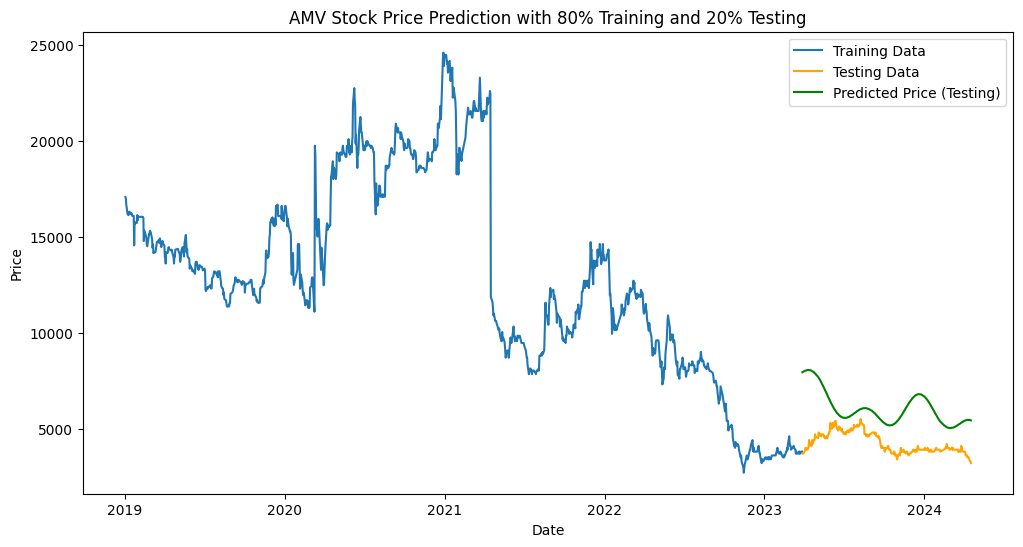

AMV Stock Price Prediction with 70% Training and 30% Testing - Testing RMSE: 6841.46, MAPE: 165.18%, MSLE: 0.96


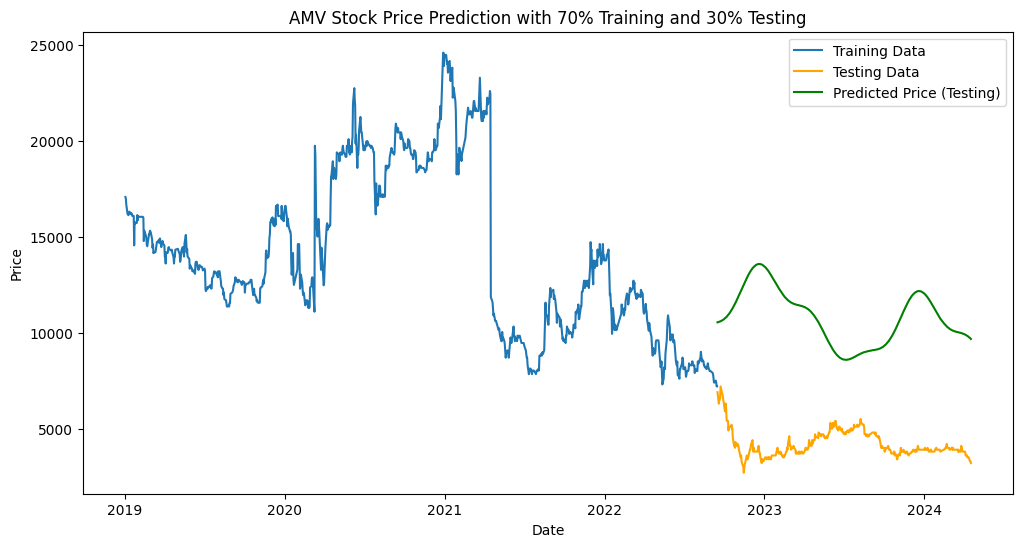

AMV Stock Price Prediction with 90% Training and 10% Testing - Testing RMSE: 1441.58, MAPE: 33.21%, MSLE: 0.10


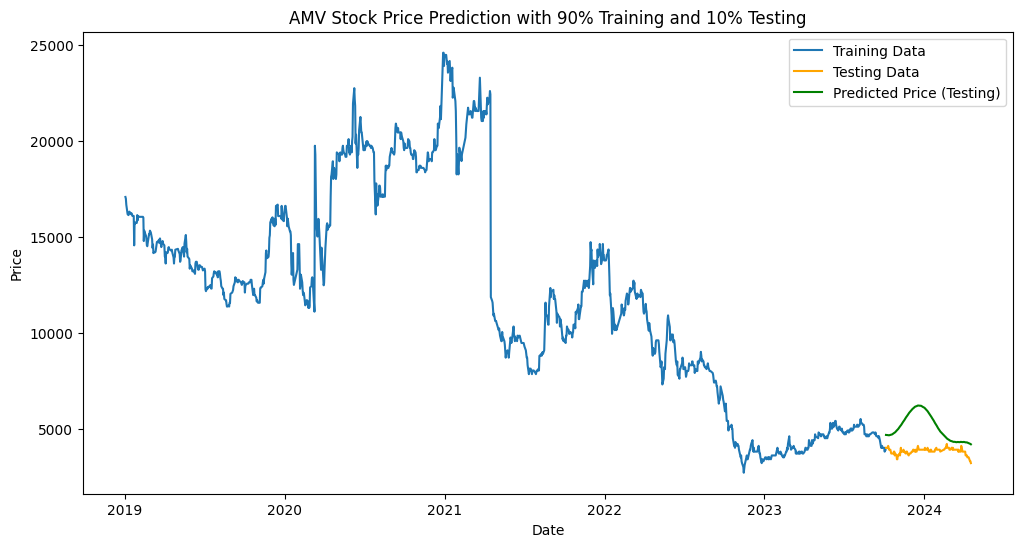

In [13]:
# Load data
df = pd.read_csv('AMV Historical Data.csv', parse_dates=['Date'])

# Sort the DataFrame by date
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)

# Clean the Price column by removing commas and converting to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Define Fourier terms for annual seasonality
fourier = CalendarFourier(freq='YE', order=3)

# Define the deterministic process
dp = DeterministicProcess(
    index=df.index,
    constant=True,    # includes intercept
    order=1,          # includes linear trend
    seasonal=False,   # no built-in seasonal terms
    additional_terms=[fourier],
    drop=True,
)

X = dp.in_sample()

def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    msle = mean_squared_log_error(y_true, y_pred)
    return rmse, mape, msle

def plot_predictions(train_ratio, title):
    train_size = int(len(X) * train_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = df['Price'][:train_size], df['Price'][train_size:]

    # Fit the linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions for the testing set
    predictions_test = model.predict(X_test)

    # Evaluate testing predictions
    rmse_test, mape_test, msle_test = evaluate(y_test, predictions_test)

    print(f'{title} - Testing RMSE: {rmse_test:.2f}, MAPE: {mape_test:.2f}%, MSLE: {msle_test:.2f}')

    # Plotting predictions for the entire dataset
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[:train_size], y_train, label='Training Data')
    plt.plot(df.index[train_size:], y_test, label='Testing Data', color='orange')
    plt.plot(df.index[train_size:], predictions_test, label='Predicted Price (Testing)', color='green')
    plt.legend()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Plot predictions for different splits and print evaluation metrics
plot_predictions(0.8, 'AMV Stock Price Prediction with 80% Training and 20% Testing')
plot_predictions(0.7, 'AMV Stock Price Prediction with 70% Training and 30% Testing')
plot_predictions(0.9, 'AMV Stock Price Prediction with 90% Training and 10% Testing')